This notebook explains the district wise distribution of Covid-19 cases in Kerala.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('chronoPositiv.csv')   # tAKING DATA.
print(dt.head(6))
print(dt.info())

       Date        District PersonType  NumberOfPatients PresentStatus  \
0  09/03/20        Thrissur     native                 1      negative   
1  09/03/20      Alappuzha      native                 1      negative   
2  09/03/20        Kasargod     native                 1      negative   
3  09/03/20  Pathanamthitta     native                 5      negative   
4  09/03/20       Ernakulam     native                 1      negative   
5  10/03/20        Kottayam     native                 2      negative   

      Remarks DischargedDate  
0  discharged       17/03/20  
1  discharged       17/03/20  
2  discharged       17/04/20  
3  discharged       01/04/20  
4  discharged       27/03/20  
5  discharged       12/04/20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
Date                346 non-null object
District            341 non-null object
PersonType          341 non-null object
NumberOfPatients    346 non-null int64
P

In [3]:
# Creating new column for cumulative number of positive cases.

Cumsum = [0 for i in range(0,len(dt))]   # Initializing cumulative sum as zero.
dt['Cumulative_number_of_cases']= Cumsum


In [4]:
# 'Date' column is in object format.Change that into datetime.

dt['Date'] = pd.to_datetime(dt['Date'], dayfirst=True)#.dt.strftime('%d/%m/%Y')

dt.info() # recheck.

# setting index to 'Date'
dt.set_index('Date',inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
Date                          346 non-null datetime64[ns]
District                      341 non-null object
PersonType                    341 non-null object
NumberOfPatients              346 non-null int64
PresentStatus                 341 non-null object
Remarks                       341 non-null object
DischargedDate                327 non-null object
Cumulative_number_of_cases    346 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 21.7+ KB


In [5]:
# No. of districts affected until.
dt.iloc[:,0].value_counts()

Kasargod              102
Kannur                 76
Malappuram             25
Ernakulam              23
Kozhikode              17
Thiruvananthapuram     16
Kollam                 14
Thrissur               14
Idukki                 13
Pathanamthitta         11
Palakkad               11
Kottayam                8
Wayanad                 6
Alappuzha               5
Name: District, dtype: int64

In [6]:
# For taking the names of districts.
dt.iloc[:,0].value_counts().index

Index(['Kasargod', 'Kannur', 'Malappuram', 'Ernakulam', 'Kozhikode',
       'Thiruvananthapuram', 'Kollam', 'Thrissur', 'Idukki ', 'Pathanamthitta',
       'Palakkad', 'Kottayam', 'Wayanad', 'Alappuzha '],
      dtype='object')

In [7]:
# Districtwise cases.

kl1 = dt[dt.District=="Thiruvananthapuram"]
kl2 = dt[dt.District=="Kollam"]
kl3 = dt[dt.District=="Pathanamthitta"]
kl4 = dt[dt.District=="Alappuzha "]
kl5 = dt[dt.District=="Kottayam"]
kl6 = dt[dt.District=="Idukki "]
kl7 = dt[dt.District=="Ernakulam"]
kl8 = dt[dt.District=="Thrissur"]
kl9 = dt[dt.District=="Palakkad"]
kl10 = dt[dt.District=="Malappuram"]
kl11 = dt[dt.District=="Kozhikode"]
kl12 = dt[dt.District=="Wayanad"]
kl13 = dt[dt.District=="Kannur"]
kl14 = dt[dt.District=="Kasargod"]

In [8]:
# list of dataframes of all districts.

districts = [kl1, kl2, kl3, kl4, kl5, kl6, kl7, kl8, kl9, kl10, kl11, kl12, kl13, kl14]

In [9]:
# Function to find cumlulative number of patients in each district.

def DistCumsum():
    for d in districts:
        cumsum = 0
        for i in range(0,len(d)):
            cumsum = cumsum + d.NumberOfPatients[i]
            d.Cumulative_number_of_cases[i] = cumsum
    
DistCumsum()

/home/sandeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sandeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


/home/sandeep/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


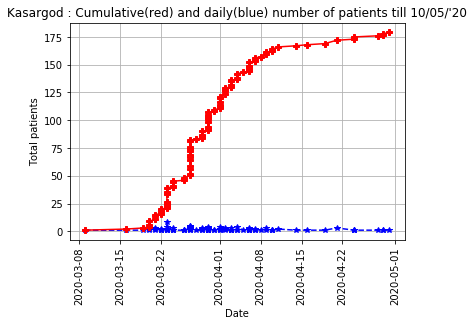

In [10]:
# top three districts with most cases -> Kasargod, Kannur and Ernakulam.

# Kasargod.
plt.plot(kl14.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl14.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Kasargod : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

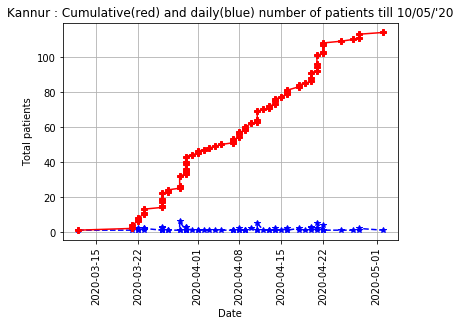

In [11]:
# Kannur.
plt.plot(kl13.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl13.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Kannur : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

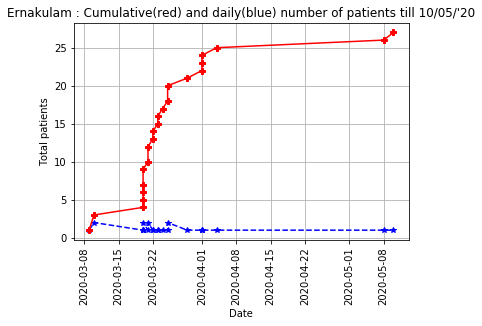

In [12]:
# Ernakulam.
plt.plot(kl7.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl7.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Ernakulam : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

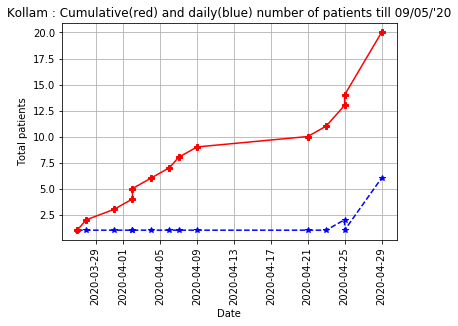

In [13]:
# Kollam.
plt.plot(kl2.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl2.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Kollam : Cumulative(red) and daily(blue) number of patients till 09/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

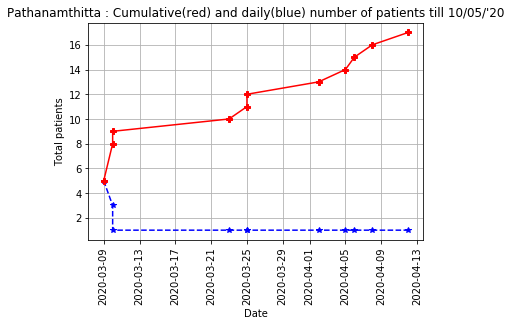

In [14]:
# Pathanamthitta.
plt.plot(kl3.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl3.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Pathanamthitta : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

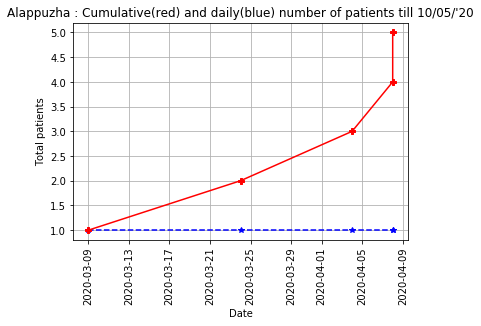

In [15]:
# Alappuzha.
plt.plot(kl4.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl4.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Alappuzha : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

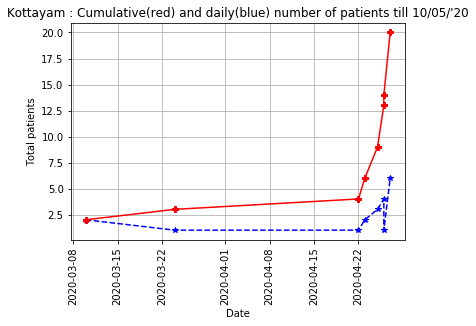

In [16]:
# Kottayam.
plt.plot(kl5.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl5.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Kottayam : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

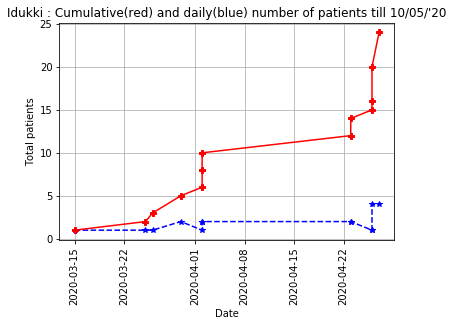

In [17]:
# Idukki.
plt.plot(kl6.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl6.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Idukki : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

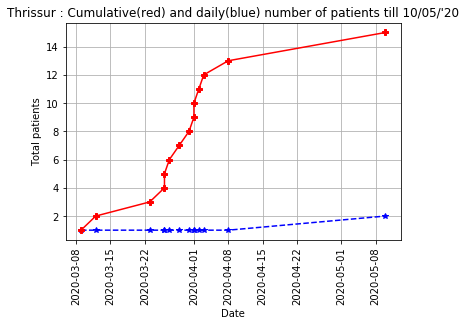

In [18]:
# Thrissur.
plt.plot(kl8.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl8.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Thrissur : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

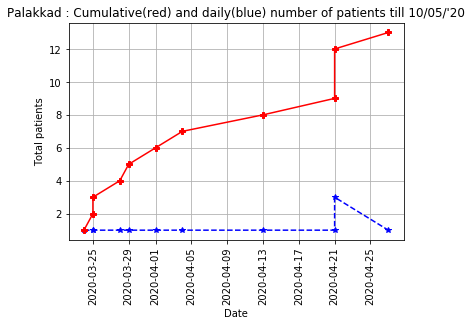

In [19]:
# Palakkad.
plt.plot(kl9.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl9.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Palakkad : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

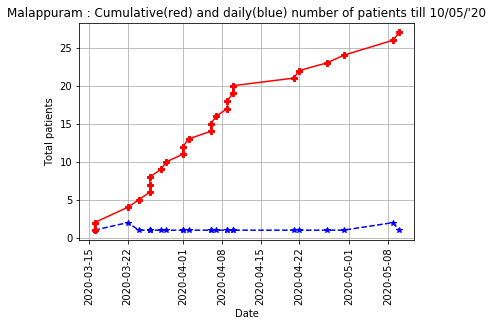

In [20]:
# Malappuram.
plt.plot(kl10.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl10.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Malappuram : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

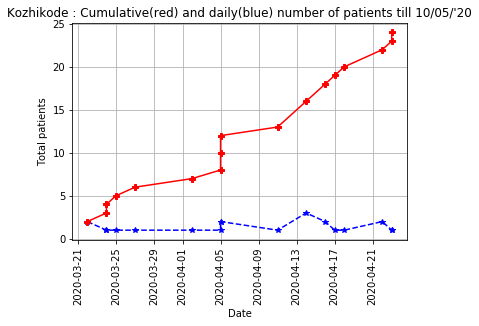

In [21]:
# Kozhikode.
plt.plot(kl11.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl11.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Kozhikode : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()

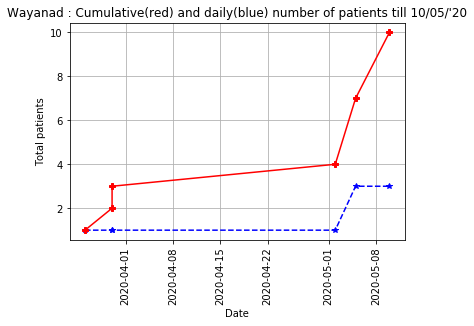

In [22]:
# Wayanad.
plt.plot(kl12.NumberOfPatients, marker='*', markersize=6, linestyle='--', color ='b')
plt.plot(kl12.Cumulative_number_of_cases, marker='P', markersize=6, linestyle='-', color ='r')

plt.title("Wayanad : Cumulative(red) and daily(blue) number of patients till 10/05/'20")
plt.ylabel("Total patients")
plt.xlabel("Date")
plt.xticks(rotation =90)
plt.grid()